# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Interpolación lineal a trozos.

### Ejercicio 8.- Se desea aproximar la función  $f(x)=2^{x^2+x}$  en el intervalo $[-1,1]$ mediante la función interpoladora lineal a trozos en $n$ nodos equiespaciados $l_n(x)$ en $n+1$ nodos equiespaciados

### $$-1=x_0<x_1<...<x_n=1.$$
    
### a) ¿Qué valor de $n$ garantiza un error de $|f(x)-l_n(x)|<0.01$ para todo $x\in[-1,1]$?

### b) Para dicho valor de $n$, utiliza la funcion $l_n(x)$ para calcular una aproximación $f(−0.3)$ y comprueba que el error real de dicha aproximación es menor que 0.01.

### c) Representa gráficamente la función  $f(x)$ y $l(x)$ en el intervalo considerado.

SOLUCIÓN

### (a) ¿Qué valor de $n$ garantiza un error de $|f(x)-l_n(x)|<0.01$ para todo $x\in[-1,1]$?

Comezamos definiendo la función $f$.

### Estudio del error cometido en la aproximación: 

En la interpolación lineal a trozos acotamos de la siguiente forma:

Dada una constante $M$ que cumpla $|f''(x)|\leq M$ para todo $x\in [a,b]$. 

La <strong>cota superior teórica</strong> del error absoluto $|f(x)-\ell(x)|$ para todo $x\in [a,b]$ es:
     $$\displaystyle cota=\frac{M}{8}\cdot \max_{j=0,\dots,n-1} \Big(X_{j+1}-X_{j}\Big)^2$$
donde $a=X_0<X_1<...<X_n=b$ son los nodos interpoladores.


Calculamos la derivada segunda de $f(x)$ y la representamos gráficamente (en valor absoluto) en dicho intervalo:

In [1]:
f(x)=2^(x^2+x)
show(f)

x |--> 2^(x^2 + x)

In [2]:
a=-1
b=1

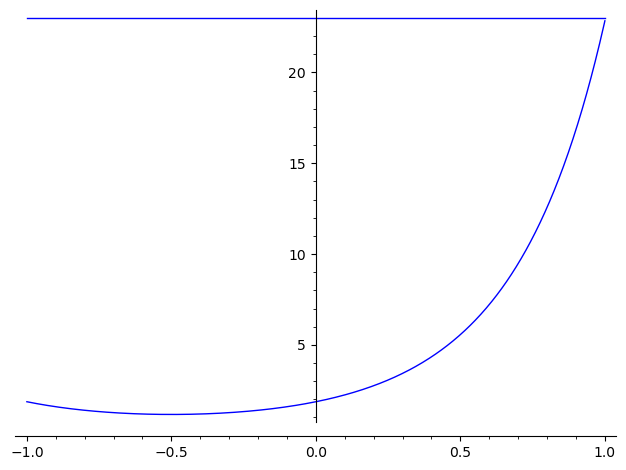

In [3]:
#buscamos la M que acote la segunda derivada de la función en [a,b]
plot(abs(diff(f,x,2)),a,b)+plot(23,a,b)

En el problema nos piden $n$ de forma que:

$$ \frac{M}{8}\cdot \max_{j=0,\dots,n-1} \Big(X_{j+1}-X_{j}\Big)^2 \leq  0.01$$

Aplicando que M es 23 necesitamos que 

$$ \frac{23}{8}\cdot \max_{j=0,\dots,n-1} \Big(X_{j+1}-X_{j}\Big)^2 \leq 0.01$$

Como los nodos están equiespaciados entonces se deduce $X_{j+1}-X_{j}=\frac{b-a}{n}$ así que buscamos $n$ de forma que

$$ \frac{23}{8} \Big(\frac{2}{n}\Big)^2 \leq  0.01$$

lo que es equivalente a buscar $n$ de forma que 

$$\Big(\frac{2}{n}\Big)^2 \leq 0.01·\frac{8}{23} \Rightarrow \frac{2}{n}  \leq \sqrt{0.01·\frac{8}{23}} \Rightarrow \frac{n}{2}  \geq \frac{1}{\sqrt{0.01·\frac{8}{23}}} \Rightarrow n \geq \frac{2}{2\sqrt{0.01·\frac{2}{23}}}=\frac{\sqrt{23}}{\sqrt{0.02}}$$


In [4]:
sqrt(23/0.02).n()# n=34

33.9116499156263

También podemos buscarlo con el siguiente bucle:

In [5]:
n=1 #también se puede buscar con este bucle:
while (23/8)*(2/n)^2>0.01:
    n=n+1
n    

34

### (b) Para dicho valor de $n$, utiliza la funcion $l_n(x)$ para calcular una aproximación $f(−0.3)$ y comprueba que el error real de dicha aproximación es menor que 0.01.

Definamos el conjunto de nodos:

In [6]:
X=[a+k*(b-a)/n for k in [0..n]]
#show(X)

La siguiente función da la expresión de la <strong>recta que pasa por los puntos $(c,f(c))$ y $(d,f(d))$</strong>, siendo $c\neq d$:

$$ y = f(c) + \frac{f(d)-f(c)}{d-c}·(x-c) $$

La definimos en sage:

In [7]:
r(c,d,x)=(f(d)-f(c))/(d-c)*(x-c)+f(c)

<p>Definimos la función interpoladora lineal a trozos de $f$ en los nodos dados, y la llamamos "$L$":</p>

In [8]:
L(x)=piecewise([ [(X[j], X[j+1]),r(X[j],X[j+1],x)]  for j in [0..n-1] ] );

In [9]:
#L

Podemos evaluar esta función interpoladora en los puntos del intervalo $[-1,1]$ que queramos, en concreto en $-0.3$

In [10]:
show(L(-0.3).n())
show(f(-0.3).n())
abs(f(-0.3)-L(-0.3)).n() < 0.01

0.864731897135373

0.864537231307865

True

### (c) Representa gráficamente la función  $f(x)$ y $l(x)$ en el intervalo considerado.

In [11]:
show(f)

x |--> 2^(x^2 + x)

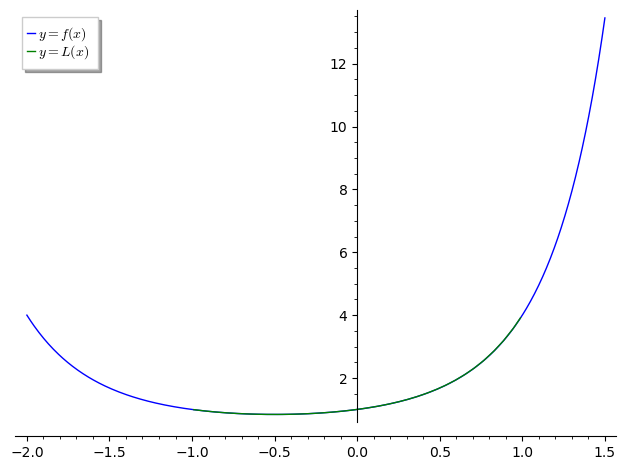

In [12]:
plot(f,-2,1.5,legend_label='$y=f(x)$')+plot(L,a,b,color='green',legend_label='$y=L(x)$') 

Como se puede ver no se aprecia la diferencia entre ambas funciones. En el siguiente gráfico la diferencia $|f(x)-L(x)|$ es muy pequeña.

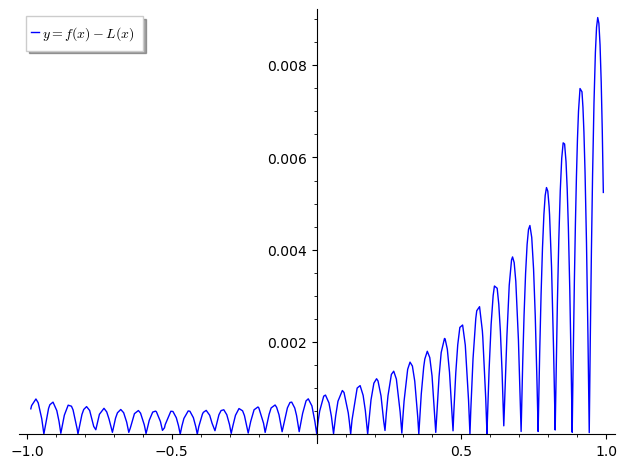

In [13]:
plot(abs(f(x)-L(x)),a,b,legend_label='$y=f(x)-L(x)$')